MNIST Handwritten Digits Recognizer

Project Overview:
The MNIST Handwritten Digits Recognizer project demonstrates how to build and train a Multi-Layer Perceptron (MLP) neural network to classify handwritten digits (0–9) using the classic MNIST dataset.
This notebook provides a complete walkthrough — from data loading and visualization to model training, performance evaluation, and interpretation of results.
The goal is to recognize images of handwritten digits by automatically learning their features from pixel data, showcasing how neural networks can solve pattern recognition problems.

Technologies & Libraries Used:

| Category                     | Libraries                                                     |
| ---------------------------- | ------------------------------------------------------------- |
| **Core ML / Neural Network** | `scikit-learn` (`MLPClassifier`)                              |
| **Data Handling**            | `numpy`, `pandas`                                             |
| **Visualization**            | `matplotlib`, `seaborn`                                       |
| **Dataset Access**           | `fetch_openml` from `sklearn.datasets`                        |
| **Preprocessing**            | `StandardScaler`                                              |
| **Evaluation**               | `accuracy_score`, `classification_report`, `confusion_matrix` |


# 1. Importing Dependencies

All required Python libraries for data manipulation, visualization, and model creation are imported:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


# 2. Loading the Dataset

The MNIST dataset is fetched directly from OpenML:

In [4]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target
X = np.array(X.astype('float32'))
y = np.array(y.astype('int'))

print("✅ Dataset fetched successfully!")


# 3. Visualizing Sample Digits

Sample images is displayed using Matplotlib:

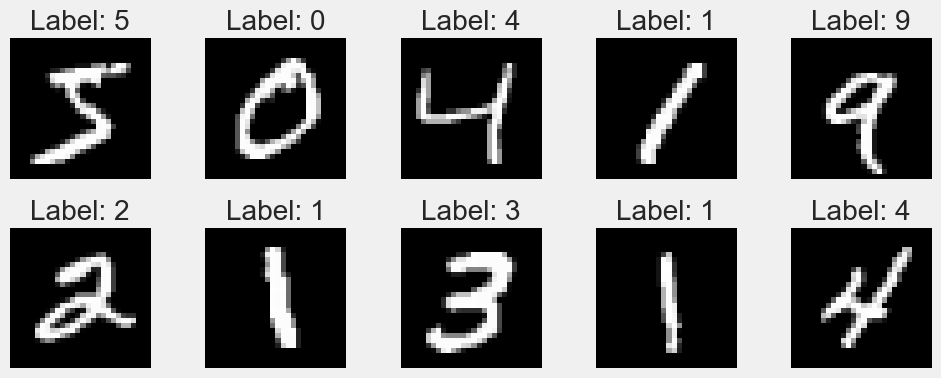

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


✅ This helps ensure that the dataset was loaded correctly and gives an intuitive understanding of what the model will learn.

# 4. Class Distribution

The notebook visualizes how often each digit appears:

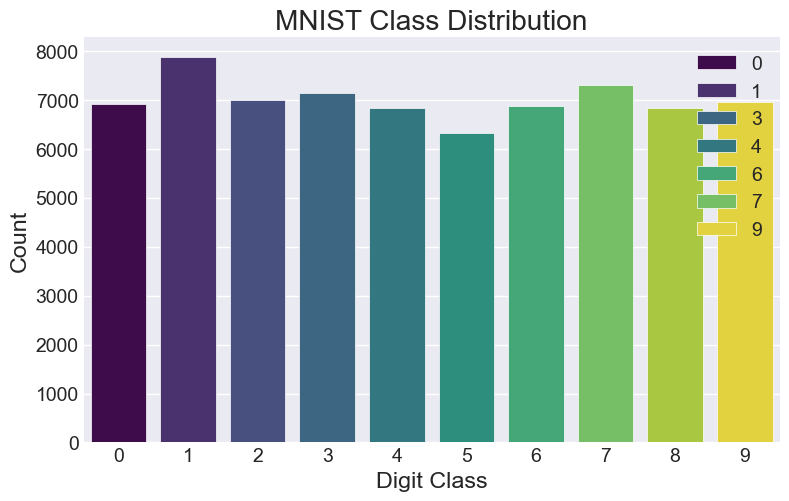


Class Distribution: 
Class 0: 6903 (9.86)%
Class 1: 7877 (11.25)%
Class 2: 6990 (9.99)%
Class 3: 7141 (10.20)%
Class 4: 6824 (9.75)%
Class 5: 6313 (9.02)%
Class 6: 6876 (9.82)%
Class 7: 7293 (10.42)%
Class 8: 6825 (9.75)%
Class 9: 6958 (9.94)%


In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y, hue=y, palette="viridis")
plt.title("MNIST Class Distribution")
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.show()

print("\nClass Distribution: ")

unique, counts = np.unique(y, return_counts=True)
for i, c in enumerate(counts):
    print(f"Class {i}: {c} ({c / len(y) * 100:.2f})%")


# 5. Splitting the Data

The dataset is split into training (80%) and testing (20%) sets using stratified sampling:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain set size: ")
print(X_train.shape[0])
print("Test set: ")
print(X_test.shape[0])



Train set size: 
56000
Test set: 
14000


# 6. Feature Scaling

Feature values (pixel intensities) are standardized to improve MLP convergence:

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n✅ Features scaled")



✅ Features scaled


# 7. Building the Neural Network

An MLPClassifier is created and trained:

In [10]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42,
    verbose=True,
    warm_start=False,
)

mlp.fit(X_train, y_train)


Iteration 1, loss = 0.33137813
Iteration 2, loss = 0.11492229
Iteration 3, loss = 0.07326537
Iteration 4, loss = 0.05132828
Iteration 5, loss = 0.03680471
Iteration 6, loss = 0.02604970
Iteration 7, loss = 0.02115187
Iteration 8, loss = 0.01739267
Iteration 9, loss = 0.01082820
Iteration 10, loss = 0.01060664
Iteration 11, loss = 0.00849537
Iteration 12, loss = 0.00931140
Iteration 13, loss = 0.01824383
Iteration 14, loss = 0.01906468
Iteration 15, loss = 0.01551119
Iteration 16, loss = 0.00673853
Iteration 17, loss = 0.00316870
Iteration 18, loss = 0.00145083
Iteration 19, loss = 0.00079162
Iteration 20, loss = 0.00051330
Iteration 21, loss = 0.00043871
Iteration 22, loss = 0.00039978
Iteration 23, loss = 0.00037138
Iteration 24, loss = 0.00035131
Iteration 25, loss = 0.00033110
Iteration 26, loss = 0.00031494
Iteration 27, loss = 0.00030220
Iteration 28, loss = 0.00029058
Iteration 29, loss = 0.00027780
Iteration 30, loss = 0.00026750
Iteration 31, loss = 0.00025965
Training loss did

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, random_state=42,
              verbose=True)

Architecture:

* 128 neurons in the first hidden layer
* 64 neurons in the second hidden layer
* ReLU activation
* Adam optimizer for adaptive learning


# 8. Predictions

Predictions are made:

In [23]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# 9. Evaluating the Model

Model performance is evaluated using:

* Accuracy score
* Classification report
* Confusion matrix

In [ ]:
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Model accuracy:")
print(f"Train Accuracy: {train_score * 100:.2f}%")
print(f"Test Accuracy: {test_score * 100:.2f}%")

In [12]:
print("Classification report:")
print(classification_report(y_train, y_train_pred))


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5522
           1       1.00      1.00      1.00      6302
           2       1.00      1.00      1.00      5592
           3       1.00      1.00      1.00      5713
           4       1.00      1.00      1.00      5459
           5       1.00      1.00      1.00      5050
           6       1.00      1.00      1.00      5501
           7       1.00      1.00      1.00      5834
           8       1.00      1.00      1.00      5460
           9       1.00      1.00      1.00      5567

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



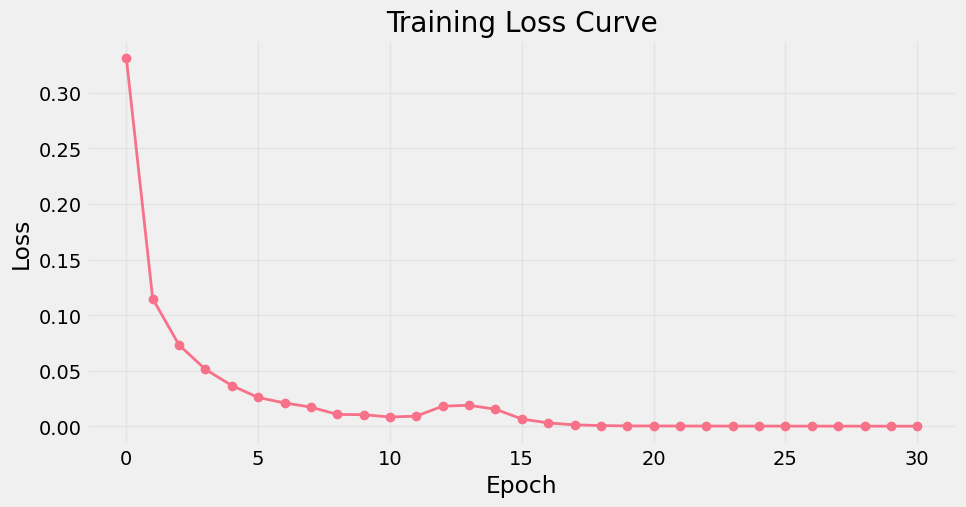

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, linewidth=2, marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 2000x1000 with 0 Axes>

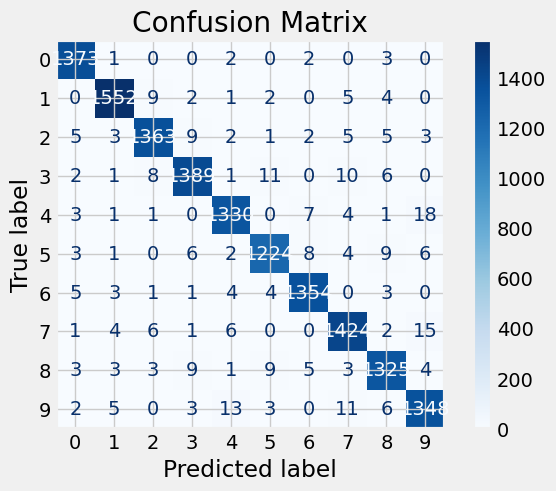

In [81]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(20, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


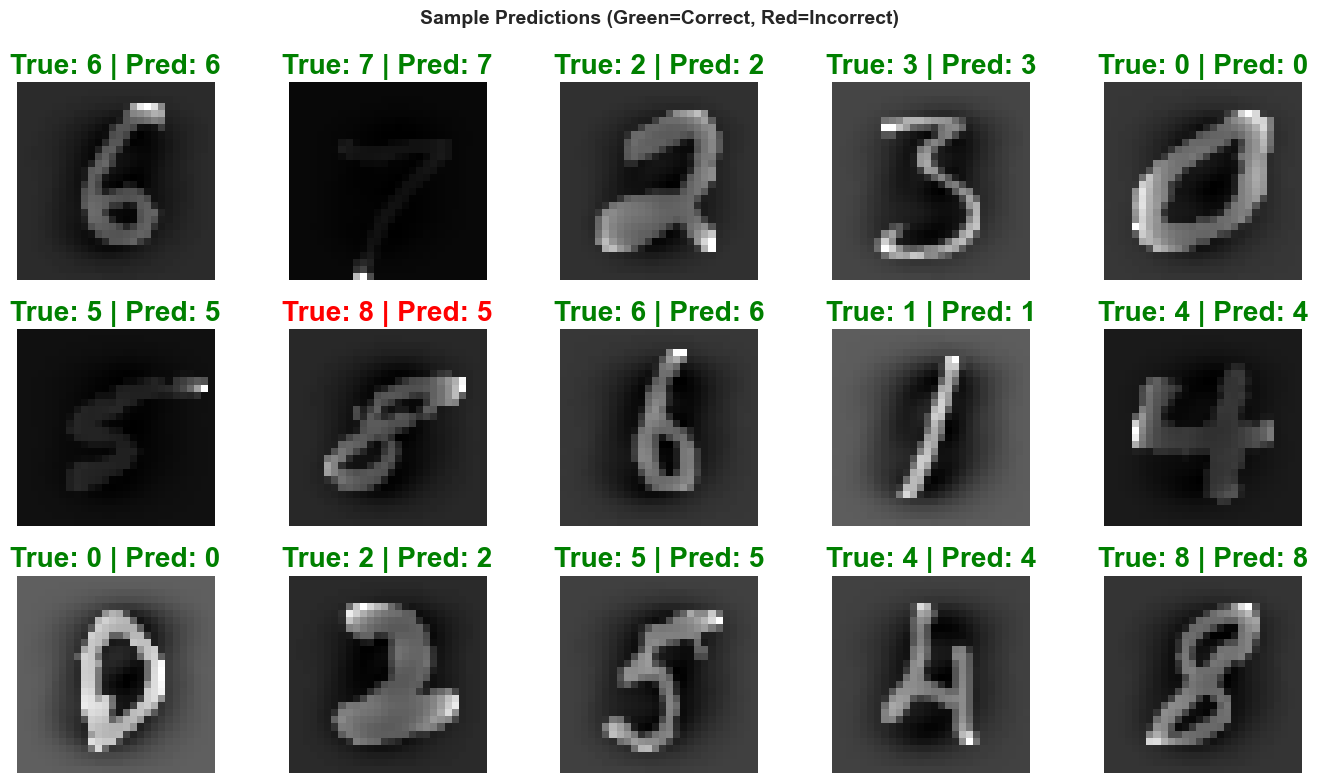

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(14, 8))
fig.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)',
             fontsize=14, fontweight='bold')

sample_indices = np.random.choice(len(X_test), 15, replace=False)

for i, (ax, idx) in enumerate(zip(axes.flat, sample_indices)):
    image = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_test_pred[idx]

    ax.imshow(image, cmap='gray')

    # Color title based on correctness
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label} | Pred: {pred_label}',
                 color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()



Total misclassified samples: 318


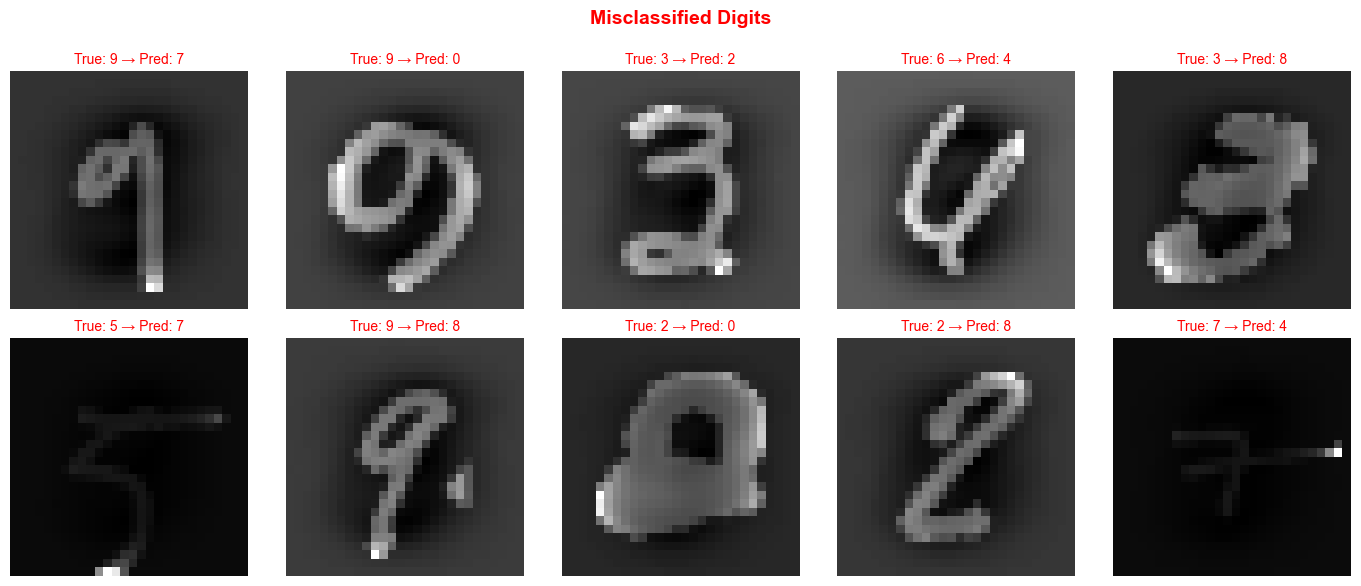

In [22]:
misclassified_idx = np.where(y_test != y_test_pred)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    fig.suptitle('Misclassified Digits', fontsize=14, fontweight='bold', color='red')

    for i, ax in enumerate(axes.flat):
        if i < len(misclassified_idx):
            idx = misclassified_idx[i]
            image = X_test[idx].reshape(28, 28)
            ax.imshow(image, cmap='gray')
            ax.set_title(f'True: {y_test[idx]} → Pred: {y_test_pred[idx]}',
                         color='red', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [20]:
print("\n" + "=" * 50)
print("FINAL MODEL SUMMARY")
print("=" * 50)
print(f"Model Type: Multi-Layer Perceptron (MLPClassifier)")
print(f"Architecture: 784 → 128 → 64 → 10")
print(f"Activation: ReLU (hidden), Softmax (output)")
print(f"Optimizer: Adam")
print(f"Total Predictions: {len(y_test)}")
print(f"Correct Predictions: {(y_test == y_test_pred).sum()}")
print(f"Incorrect Predictions: {(y_test != y_test_pred).sum()}")
print("=" * 50)


FINAL MODEL SUMMARY
Model Type: Multi-Layer Perceptron (MLPClassifier)
Architecture: 784 → 128 → 64 → 10
Activation: ReLU (hidden), Softmax (output)
Optimizer: Adam
Total Predictions: 14000
Correct Predictions: 13682
Incorrect Predictions: 318
